# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
(rumore zero e rumore bianco, scorrelato)

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [6]:
# parametri con cui giocare

N_epochs = 50
N_train = 2000
Sigma = 0.0

In [7]:


# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [8]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train) #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< N_train!
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = Sigma # noise standard deviation, for the moment it is absent <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< sigma!
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

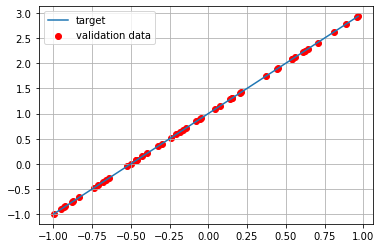

In [9]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [11]:
# NOTA: USO PYTHON 3.9.12

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))   # nota: qui non c'è una funzione di attivazione (non lineare), 
                                        # mentre è necessario aggiungerla per i punti successivi (esplorare quali vanno meglio)

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [7]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [8]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs, # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< N_epochs!
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

2022-06-08 14:51:37.131771: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 0.8422 - mse: 0.8422 - val_loss: 0.3023 - val_mse: 0.3023
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.2210 - mse: 0.2210 - val_loss: 0.1104 - val_mse: 0.1104
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0816 - mse: 0.0816 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 9.7204e-04 - mse: 

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [9]:
# return weights and biases
model.get_weights()

[array([[1.9999942]], dtype=float32), array([0.99999994], dtype=float32)]

In [10]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 1.1351e-11 - mse: 1.1351e-11

Test loss: 1.1351143115734263e-11
Test accuracy: 1.1351143115734263e-11


In [11]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 1.1351e-11 - mse: 1.1351e-11

Test loss: 1.1351143115734263e-11
Test accuracy: 1.1351143115734263e-11


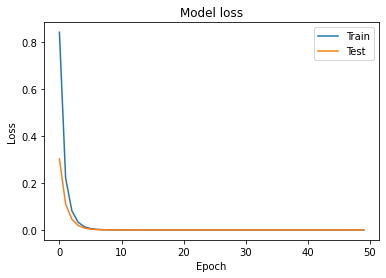

In [12]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")


100
100


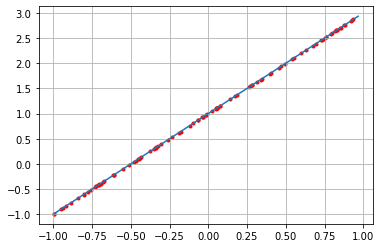

In [13]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted, y_predicted, marker = ".", color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

**OSSERVAZIONI:**

provo a tenere un numero basso di epoche (= chiedere alla rete di imparare velocemente). (ntrain = 500)
- con $\sigma = 0$, la predizione è scarsa, perchè la model loss del test non ha ancora fatto tempo a convergere a quella di train, nè a stabilizzarsi sul minimo.
- con $\sigma = 0.2$ la situazione migliora, la predizione è più accurata. La model loss è più convergiuta anche perchè partiva in origine meno lontana da quella di test.
- con $\sigma = 0.3$ la situazione sembra ottima. La differena inizale di loss tra test e train è ridotta, e con le epoche si riduce ulteriormente. Nello specifico però si nota che tra la 2a e la 3a epoca, la loss di test supera quella di train per restare sopra, come a indicare un "loss offset" (una sorta di errore sistematico).
- con $\sigma = 0.5$ simile a prima ma l'offset aumenta.

NOTA: tutte osservazioni buggate dal fatto che keras ha un generatore di numeri casuali che continua ad andare avanti ad ogni run, e le oscillazioni dei risultati erano dominate da questa cosa, soprattutto per sigma > 0.5. In linea di massima però l'osservazione è corretta: l'aumento di sigma può introdurre una specie di offset.

osservazione simile vale anche per un numero maggiore di epoche.

Naturalmente con $\sigma = 0$, all'aumentare delle epoche a un certo punto il fit tende alla perfezione. Il problema di tenere sigma nulla viene però a galla quando si ha a che fare con del rumore e una rete di tantissimi nodi che rischia di overfittare del rumore: in quel caso sigma dovrà essere dell'ordine di grandezza del rumore (?) o più, per dominare su quelle oscillazioni.

Aumentando il numero di punti di train, come ci si poteva aspettare, la rete apprnede più velocemente, ovvero si osserva ad esempio che il minimo della model loss si raggiunge in circa 20 epoche con N_train = 500, mentre si raggiunge in circa 10 epoche con N_train = 1000. Può convenire investire sul training piuttosto che sul numero di epoche, dal momento che in un caso come questo, sono le epoche ad aumentare il tempo di esecuzione del programma.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.
Ricordare gli esempi a lezione (come si riempivano i bin degli istogrammi)! Partire dal basso, quindi con pochi neutoni, pochi layers...

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer (oltre lo sgd)
- the loss function (oltre al MSE)
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model (DOMANDA MOLTO IMPORTANTE! OSSERVARE BENE!)? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Anche in questo caso andare a rivedere la lezione teorica per capire quanto serve far crescere la rete per fittare queste ondine. Cerchiamo la rete ottimale e mostriamo questa (ad esempio le predizioni che fa).

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>